<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/Josephus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
# Aumenta o limite de recursão
sys.setrecursionlimit(10000)

In [ ]:
"""
Resolve problemas de Josephus recursivamente

argumentos:
  n: numero de pessoas (1 ≤ n ≤ 10000)
  k: numero de saltos (1 ≤ k ≤ 1000)
"""
def josephus(n, k):
    """
    Resolve problemas de Josephus recursivamente

    argumentos:
        n: numero de pessoas (1 ≤ n ≤ 10000)
        k: numero de saltos (1 ≤ k ≤ 1000)
    """
    # verifica limites
    if not(1 <= n <= 10000):
        raise ValueError("n deve está entre 1 e 10000")
    if not(1 <= k <= 1000):
        raise ValueError("k deve estar entre 1 e 1000")

    # caso base
    if n == 1:
        return 1

    # chamada recursiva
    return (josephus(n - 1, k) + k - 1) % n + 1

In [ ]:
"""
Processa os cados teste recusrsivamente

argumentos:
  numero_caso: numero do caso atual
  total_casos: numero total de casos (1 ≤ NC ≤ 30)
"""
def processar_casos(numero_caso, total_casos):
    """
    Processa os casos teste recursivamente

    argumentos:
        numero_caso: numero do caso atual
        total_casos: numero total de casos (1 ≤ NC ≤ 30)
    """
    # verifica limite de casos
    if not (1 <= total_casos <= 30):
        raise ValueError("O numero de casos deve estar entre 1 e 30")

    # caso base: processou todos os casos
    if numero_caso > total_casos:
        return

    # le e valida entrada do caso atual
    n, k = map(int, input().split())

    # calcula e imprime o resultado
    resultado = josephus(n, k)
    print(f"Case {numero_caso}: {resultado}")

    # processa o proximo caso
    processar_casos(numero_caso + 1, total_casos)

In [ ]:
"""
Coleta os dados de entrada e saída do problema
Retorna: lista de dicionários com os casos
"""
def coletar_dados():
    dados = []

    # Lê número de casos
    nc = int(input("Digite o número de casos: "))
    if not (1 <= nc <= 30):
        raise ValueError("O número de casos deve estar entre 1 e 30")

    # Coleta dados de cada caso
    for i in range(1, nc + 1):
        print(f"\nCaso {i}:")
        n, k = map(int, input("Digite n e k (ex: 5 2): ").split())
        resultado = josephus(n, k)
        print(f"Case {i}: {resultado}")

        # Guarda dados do caso
        dados.append({
            'caso': i,
            'n': n,
            'k': k,
            'resultado': resultado
        })

    return dados

In [ ]:
def plotar_graficos_josephus(dados):
    """
    Gera gráficos específicos para análise do problema de Josephus
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análise do Problema de Josephus', fontsize=14)

    # Extrair dados
    casos = [d['caso'] for d in dados]
    valores_n = [d['n'] for d in dados]
    valores_k = [d['k'] for d in dados]
    resultados = [d['resultado'] for d in dados]

    # 1. Processo de Eliminação (para o primeiro caso)
    n_inicial = valores_n[0]
    pessoas_restantes = list(range(1, n_inicial + 1))
    eliminados = []
    k_inicial = valores_k[0]

    pos = 0
    for i in range(n_inicial - 1):
        pos = (pos + k_inicial - 1) % len(pessoas_restantes)
        eliminados.append(pessoas_restantes.pop(pos))

    ax1.plot(range(n_inicial), [n_inicial - i for i in range(n_inicial)], 'b-o')
    ax1.set_title(f'Processo de Eliminação (Caso 1: n={n_inicial}, k={k_inicial})')
    ax1.set_xlabel('Passos')
    ax1.set_ylabel('Pessoas Restantes')
    ax1.grid(True)

    # 2. Complexidade Recursiva
    def profundidade_recursao(n):
        return list(range(n, 0, -1))

    for i, n in enumerate(valores_n):
        prof = profundidade_recursao(n)
        ax2.plot(prof, label=f'Caso {i+1} (n={n})')

    ax2.set_title('Profundidade da Recursão')
    ax2.set_xlabel('Chamadas Recursivas')
    ax2.set_ylabel('Valor de n')
    ax2.legend()
    ax2.grid(True)

    # 3. Relação n/k vs Resultado
    razao_nk = [n/k for n, k in zip(valores_n, valores_k)]
    ax3.scatter(razao_nk, resultados, c=casos, cmap='viridis', s=100)
    ax3.set_title('Relação n/k vs Resultado')
    ax3.set_xlabel('Razão n/k')
    ax3.set_ylabel('Posição do Sobrevivente')
    for i, (x, y) in enumerate(zip(razao_nk, resultados)):
        ax3.annotate(f'Caso {i+1}', (x, y))
    ax3.grid(True)

    # 4. Análise de Complexidade
    x = np.linspace(0, max(valores_n), 100)
    ax4.plot(x, x, 'r-', label='Θ(n)')
    ax4.scatter(valores_n, valores_n, c='blue', s=100, label='Casos')
    ax4.set_title('Análise de Complexidade')
    ax4.set_xlabel('Tamanho da Entrada (n)')
    ax4.set_ylabel('Número de Operações')
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

Digite o número de casos: 3

Caso 1:
Digite n e k (ex: 5 2): 5 2
Case 1: 3

Caso 2:
Digite n e k (ex: 5 2): 6 3
Case 2: 1

Caso 3:
Digite n e k (ex: 5 2): 1234 233
Case 3: 25


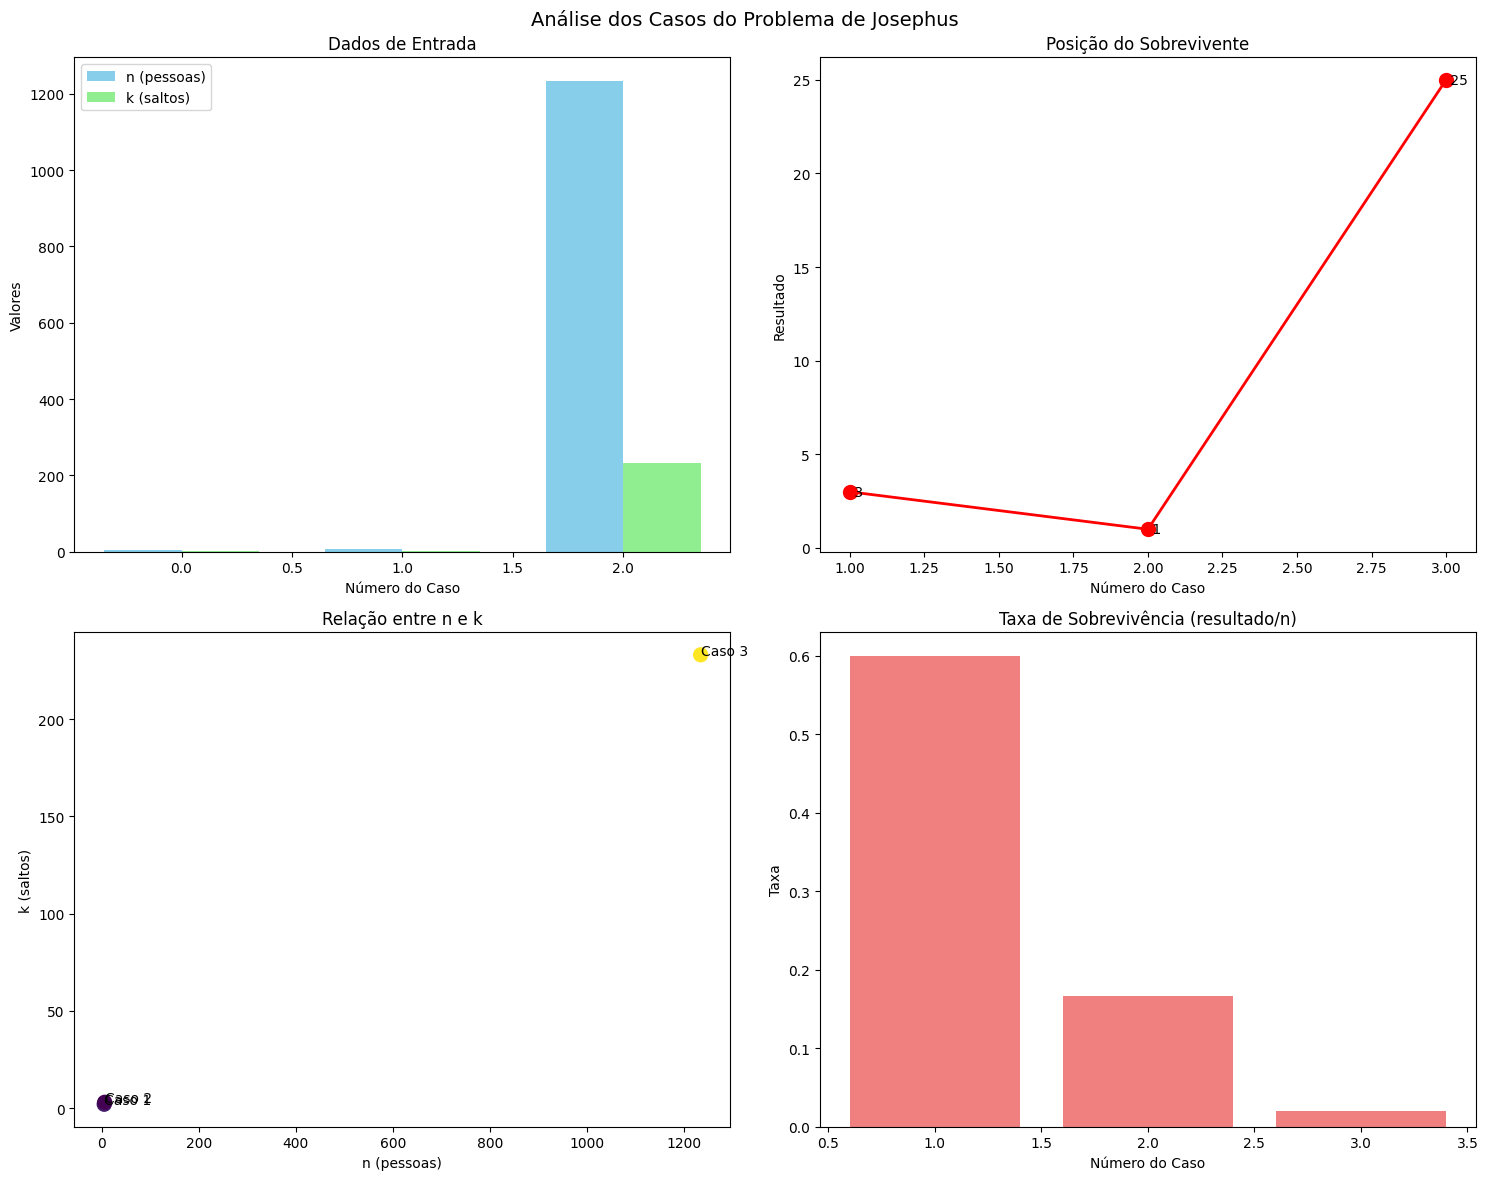

In [ ]:
def main():
    # Coleta dados
    try:
        dados = coletar_dados()
        # Gera gráficos
        plotar_graficos(dados)
    except ValueError as e:
        print(f"Erro: {e}")

if __name__ == "__main__":
    main()

"""
ANÁLISE DE COMPLEXIDADE DO PROBLEMA DE JOSEPHUS

1. Função josephus(n, k):
   - Faz n chamadas recursivas até chegar ao caso base
   - Cada chamada faz operações O(1)
   Complexidade: O(n)

2. Função processar_casos(numero_caso, total_casos):
   - Faz NC chamadas recursivas (NC ≤ 30)
   - Cada chamada:
     * Leitura de entrada: O(1)
     * Chamada josephus(): O(n)
   Complexidade: O(NC * n)

3. Função main():
   - Leitura inicial: O(1)
   - Chamada processar_casos(): O(NC * n)
   Complexidade total: O(NC * n)

Onde:
- n é o número de pessoas (1 ≤ n ≤ 10000)
- NC é o número de casos (1 ≤ NC ≤ 30)

COMPLEXIDADE FINAL: O(NC * n)

Exemplo prático:
Para o pior caso:
- NC = 30 (máximo de casos)
- n = 10000 (máximo de pessoas)
Resultando em: 30 * 10000 = 300000 operações

Uso de memória:
- Pilha de recursão: O(n) para josephus
- Variáveis auxiliares: O(1)
ESPAÇO TOTAL: O(n)
"""


ANÁLISE DA RECORRÊNCIA DO ALGORITMO DE JOSEPHUS

1. Equação de Recorrência:

T(1) = Θ(1)            [caso base]
T(n) = T(n-1) + Θ(1)   [caso geral]

2. Resolução:
T(n) = T(n-1) + c      [onde c é constante]
     = [T(n-2) + c] + c
     = [T(n-3) + c] + c + c
     = T(1) + c(n-1)
     = Θ(1) + c(n-1)
     = Θ(n)

3. Explicação:
- T(1): custo do caso base
- T(n-1): chamada recursiva para n-1 elementos
- Θ(1): operações constantes em cada chamada
- Resultado final: Θ(n)

```
ALGORITMO ProblemaJosephus

/*
Função josephus - Resolve o problema recursivamente
Complexidade: T(n) = T(n-1) + Θ(1) = Θ(n)
*/
FUNÇÃO josephus(n, k: INTEIRO): INTEIRO
    // Verificações de limite: Θ(1)
    SE n < 1 OU n > 10000 ENTÃO
        RETORNE ERRO "n deve estar entre 1 e 10000"
    SE k < 1 OU k > 1000 ENTÃO
        RETORNE ERRO "k deve estar entre 1 e 1000"
    
    // Caso base: Θ(1)
    SE n = 1 ENTÃO
        RETORNE 1
    
    // Chamada recursiva: T(n-1) + Θ(1)
    RETORNE (josephus(n - 1, k) + k - 1) MOD n + 1

/*
Função processar_casos - Processa casos recursivamente
Complexidade: Θ(NC * n), onde NC é número de casos
*/
FUNÇÃO processar_casos(caso_atual, total_casos: INTEIRO)
    // Verificação de limite: Θ(1)
    SE total_casos < 1 OU total_casos > 30 ENTÃO
        RETORNE ERRO "Total de casos deve estar entre 1 e 30"
    
    // Caso base: Θ(1)
    SE caso_atual > total_casos ENTÃO
        RETORNE
    
    // Leitura de entrada: Θ(1)
    LEIA n, k
    
    // Cálculo do resultado: Θ(n)
    resultado ← josephus(n, k)
    
    // Impressão: Θ(1)
    ESCREVA "Case ", caso_atual, ": ", resultado
    
    // Chamada recursiva: T(NC-1)
    processar_casos(caso_atual + 1, total_casos)

/*
Programa Principal
Complexidade Total: Θ(NC * n)
*/
INÍCIO
    // Leitura inicial: Θ(1)
    LEIA NC
    
    // Verificação: Θ(1)
    SE NC < 1 OU NC > 30 ENTÃO
        RETORNE ERRO "NC deve estar entre 1 e 30"
    
    // Processamento dos casos: Θ(NC * n)
    processar_casos(1, NC)
FIM
```


Análise de Complexidade:

1. Função josephus:
   T(1) = Θ(1)            [caso base]
   T(n) = T(n-1) + Θ(1)   [caso geral]
   Solução: T(n) = Θ(n)

2. Função processar_casos:
   T(1) = Θ(n)            [um caso]
   T(NC) = Θ(NC * n)      [todos os casos]

3. Complexidade Total:
   Tempo: Θ(NC * n)
   Espaço: Θ(n) [pilha de recursão]

Onde:
- n: número de pessoas (1 ≤ n ≤ 10000)
- NC: número de casos (1 ≤ NC ≤ 30)
*/

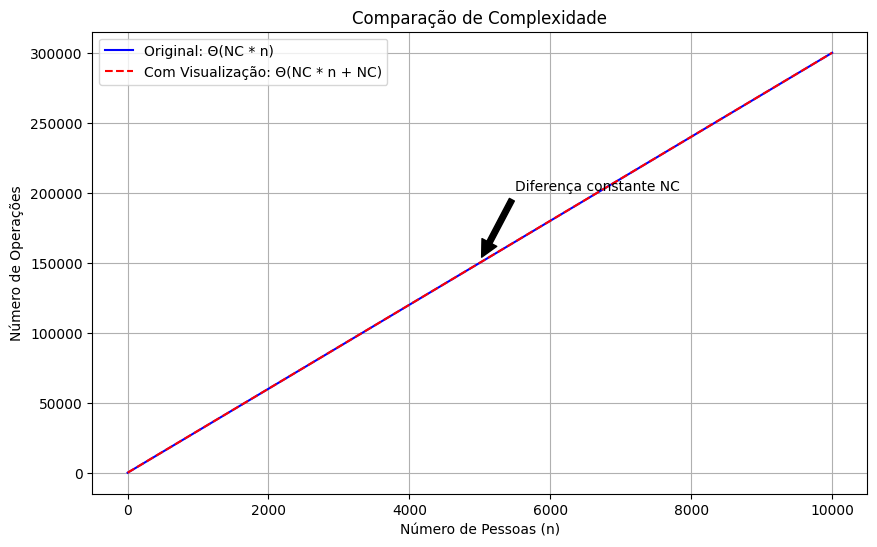

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_complexity_comparison():
    n = np.linspace(1, 10000, 100)
    NC = 30  # máximo de casos

    # Complexidades
    original = NC * n
    with_viz = NC * n + NC

    plt.figure(figsize=(10, 6))
    plt.plot(n, original, 'b-', label='Original: Θ(NC * n)')
    plt.plot(n, with_viz, 'r--', label='Com Visualização: Θ(NC * n + NC)')

    plt.title('Comparação de Complexidade')
    plt.xlabel('Número de Pessoas (n)')
    plt.ylabel('Número de Operações')
    plt.legend()
    plt.grid(True)

    # Destacar diferença
    plt.annotate('Diferença constante NC',
                xy=(5000, with_viz[50]),
                xytext=(5500, with_viz[50] + 50000),
                arrowprops=dict(facecolor='black', shrink=0.05))

    plt.show()

plot_complexity_comparison()


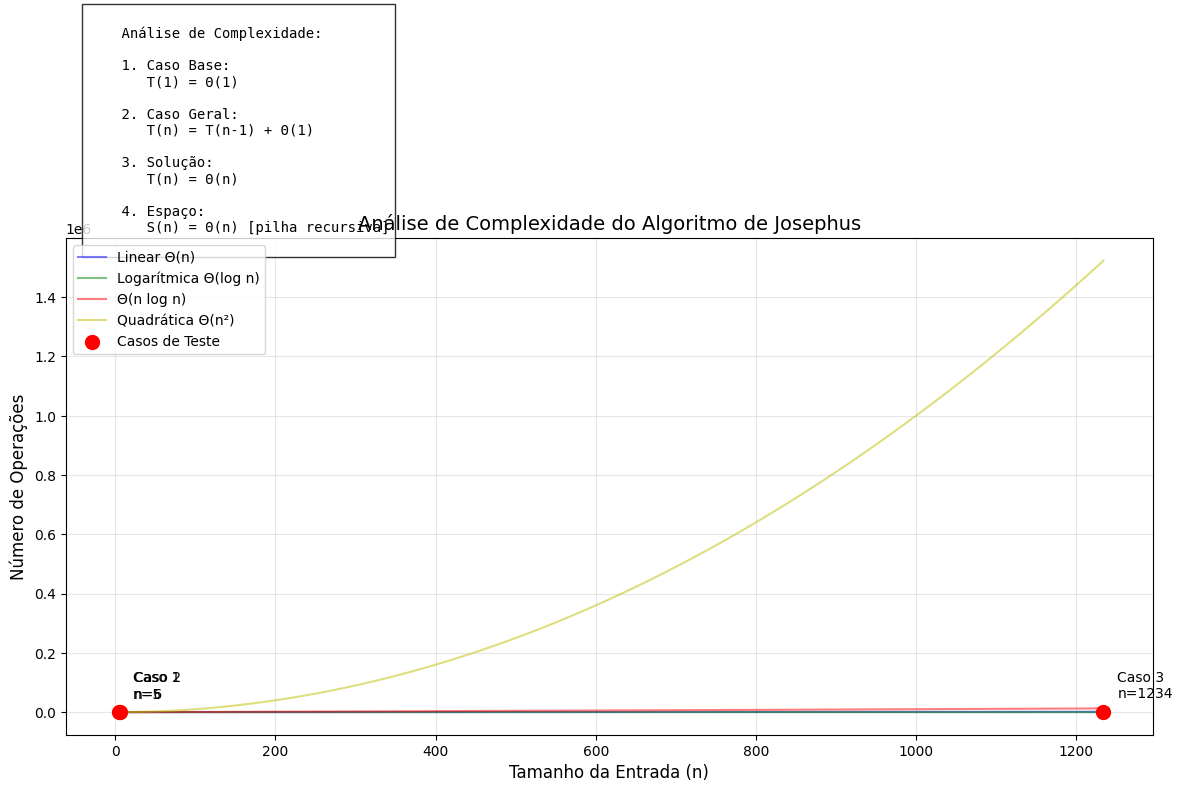

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def calcular_complexidade(dados):
    """
    Calcula e visualiza a complexidade do algoritmo de Josephus

    T(1) = Θ(1)            [caso base]
    T(n) = T(n-1) + Θ(1)   [caso geral]
    Solução: T(n) = Θ(n)
    """
    # Configuração do gráfico
    plt.figure(figsize=(12, 8))

    # Dados reais
    valores_n = [d['n'] for d in dados]
    operacoes_reais = valores_n  # cada n gera n operações

    # Curvas teóricas
    x = np.linspace(0, max(valores_n), 100)
    y_linear = x                    # Θ(n)
    y_log = np.log2(x + 1)         # Θ(log n)
    y_nlogn = x * np.log2(x + 1)   # Θ(n log n)
    y_quadratic = x**2             # Θ(n²)

    # Plotar curvas teóricas
    plt.plot(x, y_linear, 'b-', label='Linear Θ(n)', alpha=0.5)
    plt.plot(x, y_log, 'g-', label='Logarítmica Θ(log n)', alpha=0.5)
    plt.plot(x, y_nlogn, 'r-', label='Θ(n log n)', alpha=0.5)
    plt.plot(x, y_quadratic, 'y-', label='Quadrática Θ(n²)', alpha=0.5)

    # Plotar pontos reais
    plt.scatter(valores_n, operacoes_reais, color='red', s=100,
               label='Casos de Teste', zorder=5)

    # Adicionar anotações para cada caso
    for i, (n, ops) in enumerate(zip(valores_n, operacoes_reais)):
        plt.annotate(f'Caso {i+1}\nn={n}', (n, ops),
                    xytext=(10, 10), textcoords='offset points')

    # Configurações do gráfico
    plt.title('Análise de Complexidade do Algoritmo de Josephus', fontsize=14)
    plt.xlabel('Tamanho da Entrada (n)', fontsize=12)
    plt.ylabel('Número de Operações', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Adicionar texto explicativo
    plt.text(0.02, 0.98, """
    Análise de Complexidade:

    1. Caso Base:
       T(1) = Θ(1)

    2. Caso Geral:
       T(n) = T(n-1) + Θ(1)

    3. Solução:
       T(n) = Θ(n)

    4. Espaço:
       S(n) = Θ(n) [pilha recursiva]
    """, transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8),
    fontsize=10, family='monospace')

    plt.tight_layout()
    plt.show()

# Exemplo de uso
dados = [
    {'caso': 1, 'n': 5, 'k': 2, 'resultado': 3},
    {'caso': 2, 'n': 6, 'k': 3, 'resultado': 1},
    {'caso': 3, 'n': 1234, 'k': 233, 'resultado': 25}
]

calcular_complexidade(dados)